In [1]:
# !pip install -r requirements.txt
from dtw import *
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
ts_data = pd.read_excel('./negative_tweets+news_comparison.xlsx')
headers = ts_data.columns

In [10]:
list(ts_data[headers[0]])[20]

Timestamp('2016-09-01 00:00:00')

In [3]:
list_nvivo_geo = list(ts_data[headers[1]])
list_tweets_geo = list(ts_data[headers[6]])
list_nvivo_gov = list(ts_data[headers[2]])
list_tweets_gov = list(ts_data[headers[7]])
list_nvivo_mig= list(ts_data[headers[3]])
list_tweets_mig = list(ts_data[headers[8]])
list_nvivo_total = list(ts_data[headers[4]])
list_tweets_total = list(ts_data[headers[9]])

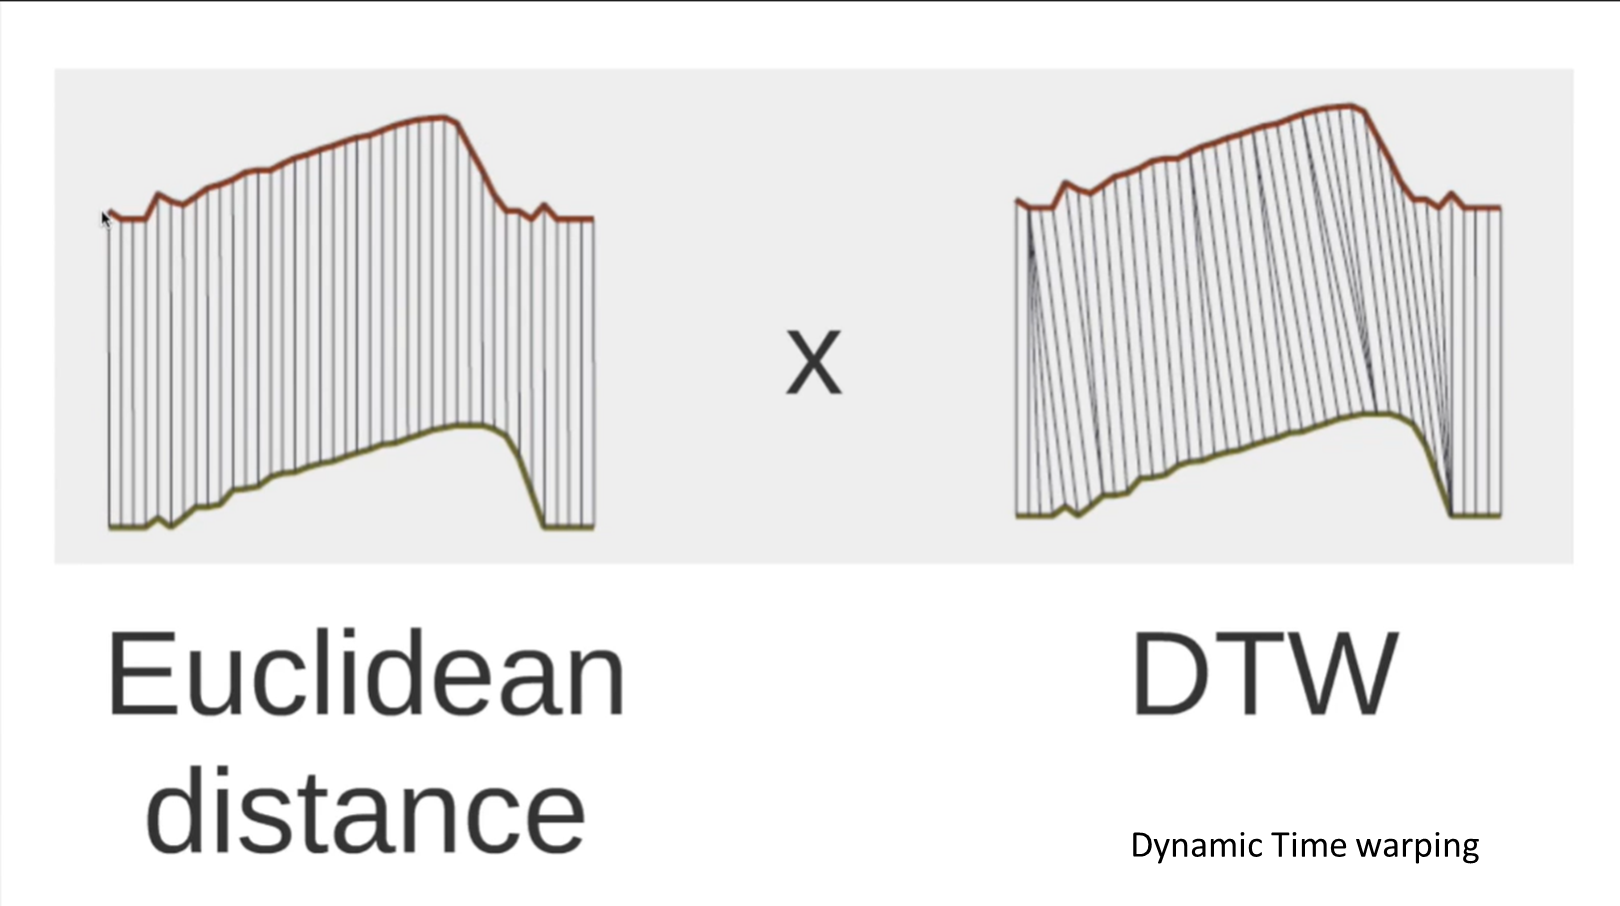

## Similarity with Dynamic Time Warping DTW

In [4]:
def stand(news_list,tweets_list):
    news_mean = statistics.mean(news_list)
    news_stdev = statistics.stdev(news_list)
    tweets_mean = statistics.mean(tweets_list)
    tweets_stdev = statistics.stdev(tweets_list)
    query = np.array([(x-news_mean)/news_stdev for x in news_list])
    template= np.array([(x-tweets_mean)/tweets_stdev for x in tweets_list])
    alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
    r = dtw(query, template, keep_internals=True, 
        step_pattern=rabinerJuangStepPattern(6, "c"))
    return(r)

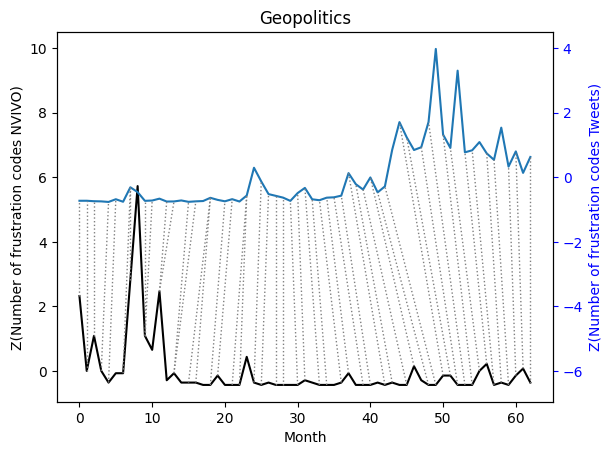

In [5]:
stand(list_nvivo_geo, list_tweets_geo)\
        .plot(type="twoway", offset=6,titl = 'Geopolitics', ylab="Z(Number of frustration codes NVIVO)", xlab="Month", ylab2 = "Z(Number of frustration codes Tweets)") #Go to dtwPlot.py and change the values 
plt.show()

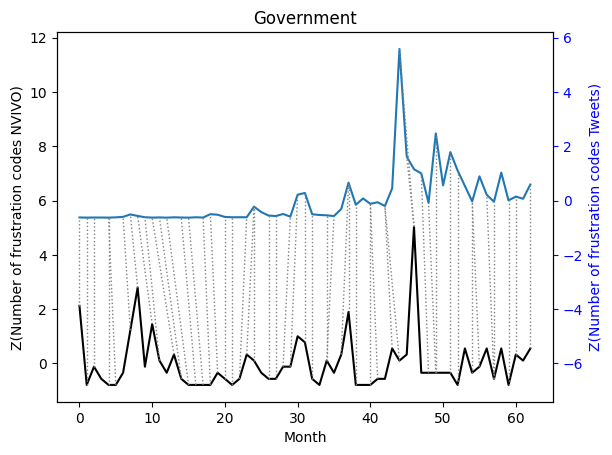

In [6]:
stand(list_nvivo_gov, list_tweets_gov)\
        .plot(type="twoway", offset=6,titl = 'Government', ylab="Z(Number of frustration codes NVIVO)", xlab="Month", ylab2 = "Z(Number of frustration codes Tweets)") #Go to dtwPlot.py and change the values 
plt.show()

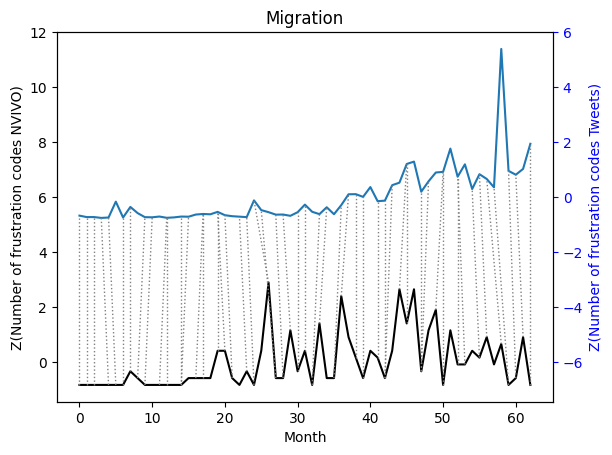

In [7]:
stand(list_nvivo_mig, list_tweets_mig)\
        .plot(type="twoway", offset=6,titl = 'Migration', ylab="Z(Number of frustration codes NVIVO)", xlab="Month", ylab2 = "Z(Number of frustration codes Tweets)") #Go to dtwPlot.py and change the values 
plt.show()

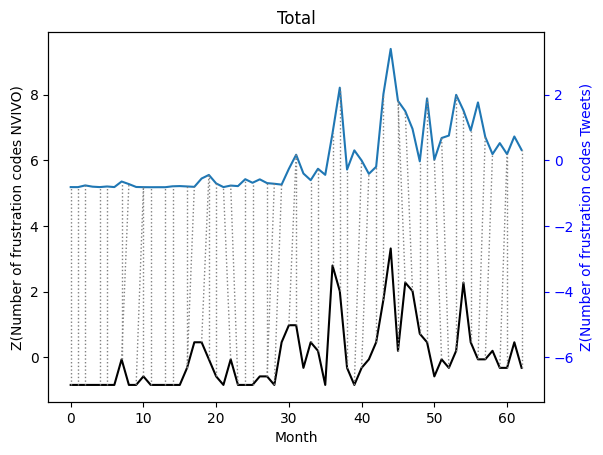

In [8]:
stand(list_nvivo_total, list_tweets_total)\
        .plot(type="twoway", offset=6,titl = 'Total', ylab="Z(Number of frustration codes NVIVO)", xlab="Month", ylab2 = "Z(Number of frustration codes Tweets)") #Go to dtwPlot.py and change the values 
plt.show()